# 

In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from problems import IntegerKnapsackPisinger

from circuit_lengths import add_lengths_to_df
from regressor import fit_multi

import quantum_plots as qp
_ = qp.global_setup()

In [71]:
df = pd.read_feather("../../results/pisinger_main.feather")

df["method"] = df.qaoa

df = df[np.logical_not(np.isnan(df.n_qubits))]
df = df[df.qaoa != "qpe"]
df = df.query("qaoa != 'quad_penalty_cost' or cost == 'masked_cost'")


(1e-07, 1.0)

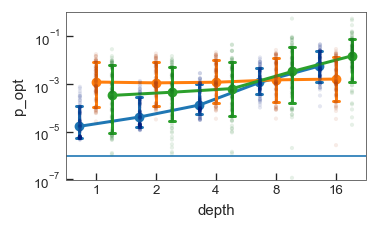

In [195]:
fig, _ = qp.plot_setup()
sns.pointplot(df, x="depth", y="p_opt", hue="method", dodge=.55, legend=False, estimator=np.median, capsize=0.1, errorbar=("pi", 75))
sns.stripplot(df, x="depth", y="p_opt", hue="method", dodge=True, alpha=0.1, legend=False, marker='.', palette="dark", jitter=False)

plt.yscale("log")
fig.tight_layout()

plt.axhline(1 / (1 << 20))

plt.ylim((1e-7, 1e-0))

,depth,energy,approx_ratio,feas_ratio,feas_approx_ratio,p_opt,p_999,p_99,p_9,rnd_approx_ratio,...,p_succ,ancilla,shift,clops,two_qubit_ops,weight_ratio,feas_perc,adj_clops,log_adj_clops,counter
count,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,0.0,0.0,0.0,96.000000,96.000000,96.000000,96.000000,9.600000e+01,96.000000,96.0
mean,16.0,-460.446319,0.216386,0.271573,0.822245,0.010124,0.010201,0.015597,0.082329,0.215864,...,NaN,NaN,NaN,1902.666667,12172.333333,0.115486,0.001298,8.058191e+05,12.736998,1.0
std,0.0,432.293910,0.167695,0.216928,0.050571,0.010265,0.010215,0.011443,0.066070,0.167269,...,NaN,NaN,NaN,26.230824,438.721844,0.023291,0.002028,1.860468e+06,1.220322,0.0
min,16.0,-2065.053923,0.020201,0.024547,0.693333,0.000114,0.000114,0.000114,0.005758,0.020140,...,NaN,NaN,NaN,1840.000000,11136.000000,0.079556,0.000097,4.334672e+04,10.676986,1.0
25%,16.0,-712.829855,0.077132,0.086523,0.796566,0.002348,0.002494,0.007602,0.042396,0.076981,...,NaN,NaN,NaN,1904.000000,12192.000000,0.095775,0.000270,1.274362e+05,11.755366,1.0
50%,16.0,-273.188180,0.163055,0.202366,0.827213,0.005514,0.005839,0.013519,0.059578,0.162659,...,NaN,NaN,NaN,1904.000000,12192.000000,0.107044,0.000653,3.462075e+05,12.753524,1.0
75%,16.0,-131.695936,0.336910,0.410467,0.855794,0.014941,0.014941,0.022402,0.091336,0.336173,...,NaN,NaN,NaN,1904.000000,12192.000000,0.136113,0.001676,8.109642e+05,13.605973,1.0
max,16.0,-24.584964,0.825691,0.932707,0.917895,0.043925,0.043925,0.061051,0.416506,0.823544,...,NaN,NaN,NaN,1968.000000,13280.000000,0.174900,0.016273,1.669872e+07,16.630842,1.0


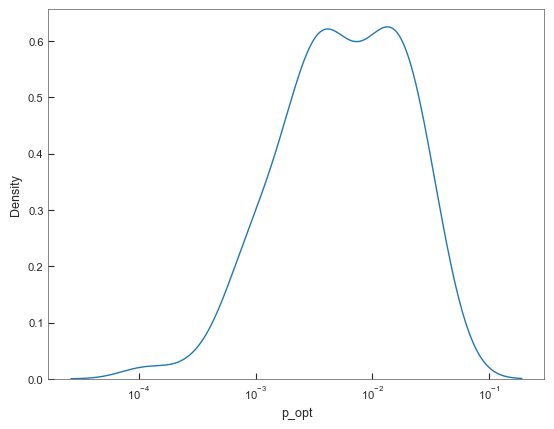

In [167]:
di = df.query("depth == 16 and method == 'masked_cost'").copy()
di["counter"] = 1

sns.kdeplot(di, x="p_opt", log_scale=True)

di.describe()

(1e-07, 1.0)

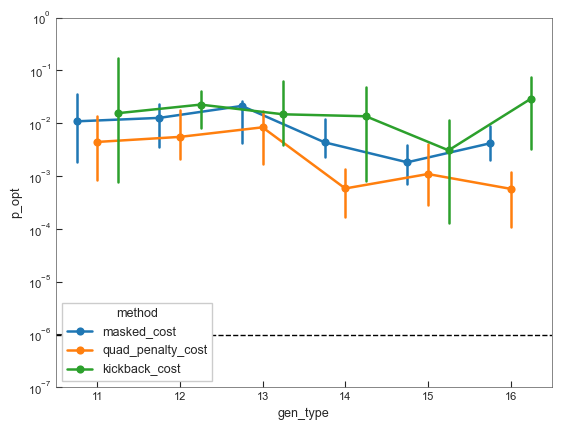

In [194]:
sns.pointplot(df.query("depth == 16"), x="gen_type", y="p_opt", hue="method", dodge=0.5, errorbar=("pi", 75), estimator=np.median)

plt.yscale("log")

plt.axhline(1 / (1 << 20), color="k", linestyle="--")

plt.ylim(1e-7, 1e-0)

In [95]:
add_lengths_to_df(df, IntegerKnapsackPisinger)

In [98]:
df["adj_clops"] = df.clops / df.p_opt

df["log_adj_clops"] = np.log(df.adj_clops)

(610.3615158104539, 100000000.0)

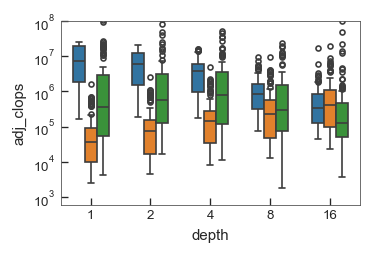

In [122]:
qp.plot_setup()

sns.boxplot(df, x="depth", y="adj_clops", hue="method", width=0.6, legend=False)

plt.yscale("log")

plt.ylim((None, 1e8))

# plt.axhline((1 << 20))

,weight_ratio,p_opt,approx_ratio,n_qubits,log_penalty
weight_ratio,1.000000,-0.217989,0.495052,NaN,0.249398
p_opt,-0.217989,1.000000,0.108948,NaN,-0.315561
approx_ratio,0.495052,0.108948,1.000000,NaN,0.143976
n_qubits,NaN,NaN,NaN,NaN,NaN
log_penalty,0.249398,-0.315561,0.143976,NaN,1.000000


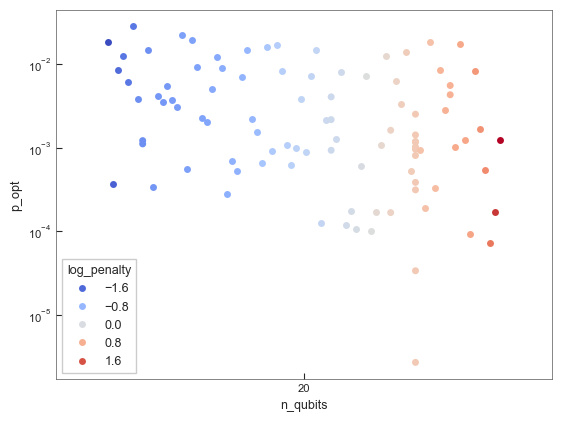

In [110]:
dfx = df[df.qaoa == "quad_penalty_cost"]
dfx = dfx.query("depth == 16")
dfx["log_penalty"] = np.log10(dfx.set_penalty)

sns.stripplot(dfx, x="n_qubits", y="p_opt", hue="log_penalty", palette="coolwarm", dodge=True, jitter=False)
plt.yscale("log")

dfx[["weight_ratio", "p_opt", "approx_ratio", "n_qubits", "log_penalty"]].corr()

In [14]:
instances = IntegerKnapsack.get_instances()[10][:64]

dat = []
for prb in instances:
    r = prb.max_capacity / sum(prb.weights)
    dg = prb.kickback_cost().scale_between_sym()
    dat += [{"id": prb.id, "weight_ratio": r, "value": v} for v in dg.to_numpy()]

In [15]:
df_prb = pd.DataFrame(dat)
df_prb["wrr"] = df.weight_ratio.transform(lambda x: np.round(x, 1))

In [16]:
# sns.histplot(df_prb, x="value", hue="id", alpha=0.1, palette="muted")

In [18]:
dfx.query("set_penalty < 0.02").set_penalty

7532     0.007396
7652     0.018904
7812     0.008264
8142     0.017751
8152     0.018904
8502     0.017778
8562     0.016790
8612     0.009452
8642     0.015556
8912     0.015625
10642    0.010417
10852    0.019722
10872    0.015306
11202    0.017600
11837    0.015625
Name: set_penalty, dtype: float64

In [37]:
prb = IntegerKnapsackPisinger.get_instances()[20][100]

cost, constr = prb.diagonalized()
norm = np.abs(cost.min_val)
cost = cost / norm

cost_arr = cost.to_numpy()

feas = (constr >= 0).to_numpy()
print(feas.sum())

dfu = pd.DataFrame(np.stack([prb.masked_cost().to_numpy(), feas]).T, columns=["v", "c"])

193.0


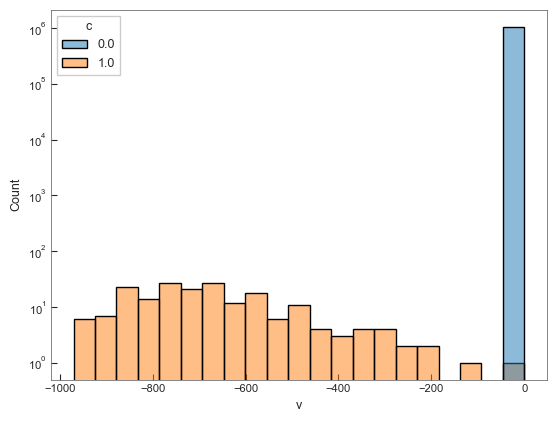

In [38]:
sns.histplot(dfu, x="v", hue="c")
plt.yscale("log")
# plt.xlim(-1, -0.8)
# plt.ylim(0, 200)

In [42]:
qpc = prb.quad_penalty_cost() / norm
print(prb._penalty)

dfu2 = pd.DataFrame(np.stack([qpc.to_numpy(), feas]).T, columns=["v", "c"])

0.10937499998291017


<Axes: xlabel='v', ylabel='Count'>

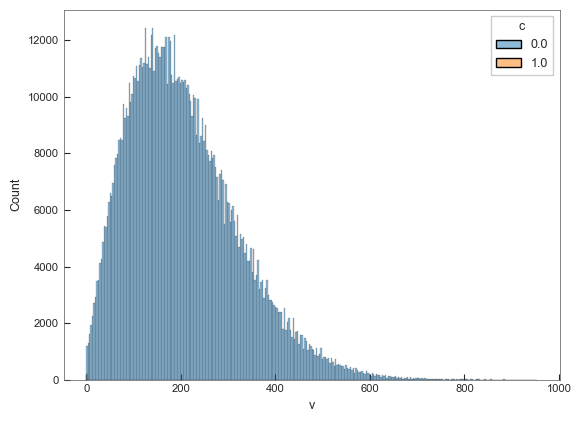

In [45]:
sns.histplot(dfu2, x="v", hue="c")
# plt.xscale("symlog")
# plt.xlim(-0.8, -0.6)
# plt.ylim(0, 200)

In [23]:
prb._penalty

0.9999999900000002

In [83]:
df["log_penalty"] = df.set_penalty.transform(lambda x: x if np.isnan(x) else np.log10(x))

## Correlation of instance types

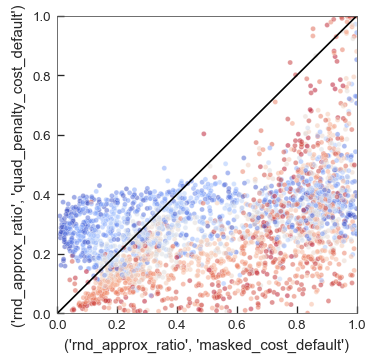

In [132]:
qp.plot_setup(aspect_ratio=1)
dfp = df.pivot(index=["problem_id", "n_qubits", "depth"], columns="method")
# dfp = dfp.query("depth == 16")
# dfp["weight_ratio"] = dfp[("weight_ratio", "masked_cost_default")]
# dfp["set_penalty"] = dfp[("set_penalty", "quad_penalty_cost_default")]
# plt.yscale("log")
# plt.xscale("log")

plt.ylim((0, 1))
plt.xlim((0, 1))

c = "rnd_approx_ratio"
default = lambda x: dfp[(x, "quad_penalty_cost_default")]
sns.scatterplot(dfp, x=(c, "masked_cost_default"), y=(c, "quad_penalty_cost_default"), hue=default("weight_ratio"), alpha=0.5, legend=False, palette="coolwarm")
plt.plot([0, 1], [0, 1], color="k")

Text(0, 0.5, 'Penalty RAAR')

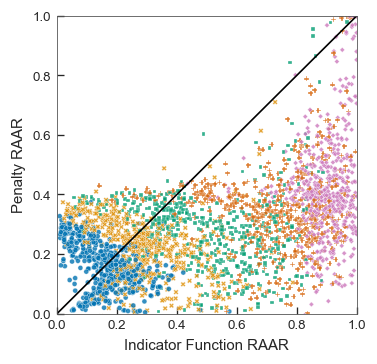

In [154]:
qp.plot_setup(aspect_ratio=1)

c = "rnd_approx_ratio"
default = lambda x: dfp[(x, "quad_penalty_cost_default")]
sns.scatterplot(dfp, x=(c, "masked_cost_default"), y=(c, "quad_penalty_cost_default"), hue="depth", style="depth", alpha=0.8, legend=False, palette="colorblind")
plt.plot([0, 1], [0, 1], color="k")

plt.ylim((0, 1))
plt.xlim((0, 1))

plt.xlabel("Indicator Function RAAR")
plt.ylabel("Penalty RAAR")